In [12]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Final structure of the dataset:
              Data Type
carat           float64
cut      string[python]
color    string[python]
clarity  string[python]
depth           float64
table           float64
price             int64
x               float64
y               float64
z               float64


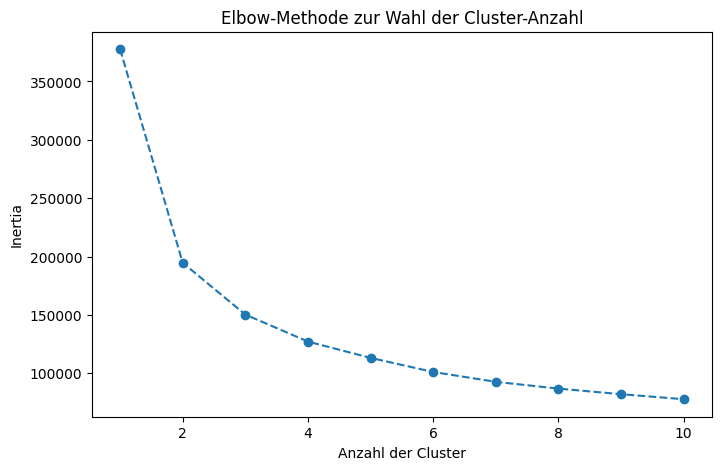

Cluster-Zentren:
 [[ 0.32324131  0.0528675   0.1711264   0.14759614  0.48353732  0.47034495
   0.47932271]
 [ 1.90830693 -0.01490834  0.26197022  2.0395305   1.6861664   1.6528096
   1.64944843]
 [-0.8359852  -0.04195574 -0.22571262 -0.7202681  -0.91191827 -0.89070356
  -0.89758792]]
Cluster
2    24913
0    21816
1     7211
Name: count, dtype: int64


In [ ]:
silent = True
%run ../dataLoadAndPrepare.ipynb

#print(df.head())
#print(df.info())

# Nur numerische Spalten auswählen --> k-means kann nur gut mit numerischen Daten umgehen
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns].dropna()  # Fehlende Werte entfernen

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

#Bestimmung der Anzahl der Cluster
# Elbow-Methode

inertia = []
cluster_range = range(1, 11)  # Testen von 1 bis 10 Clustern

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    
# Plot der Inertia-Werte
plt.figure(figsize=(8,5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Inertia')
plt.title('Elbow-Methode zur Wahl der Cluster-Anzahl')
plt.show()

# Vor k = 2 nimmt die Inertia sehr stark ab.
# Nach k = 3 wird die Reduktion kleiner, d. h., zusätzliche Cluster verbessern die Clustering-Qualität nicht mehr so stark.



# K-Means Clustering mit k = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_numeric['Cluster'] = kmeans.fit_predict(df_scaled)

# Cluster-Zentren anzeigen
print("Cluster-Zentren:\n", kmeans.cluster_centers_)

# Cluster-Anzahl überprüfen
print(df_numeric['Cluster'].value_counts())


# PCA für 2D-Visualisierung
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Scatterplot der Cluster
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df_numeric['Cluster'], palette='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clustering (k=3) in 2D')
plt.legend(title="Cluster")
plt.show()